
1. pickle file 읽기 : news crawling data
2. 명사 추출 : kkma
3. 전처리 : 단어길이 제한, 숫자 제외
4. Wordcloud


In [2]:
# 패키지 설치
from konlpy.tag import Kkma # class
from wordcloud import WordCloud
import pickle

# object 생성
kkma = Kkma()

# 1. pickle file 읽기 : news_data.pck

In [5]:
file = open('C:/IITT/4_Python-II/workplace/chap07_Textmining/data/news_data.pck', mode='rb')
news_data = pickle.load(file)
file.close()
print(news_data[:10])
len(news_data) # 11600
type(news_data) # list


['의협 "감염병 위기경보 상향 제안..환자 혐오 멈춰야"', "'신종코로나 진원' 중국 후베이성 춘제연휴 13일까지 재연장", '높아진 국가청렴도..제도개혁이 관건', '"독일 공군기, 중국 우한서 100여명 태우고 본국으로"', '이견 여전한 방위비 협상..이달 타결될까', '의사협회 "감염위기 \'심각\'으로 상향을..위험국가 입국 제한도"', '6년 만의 시진핑 방한에도 영향.."3~4월은 어렵다"', '진천군, 우한 교민 임시생활 국가인재개발원 일대 방역 강화(종합)', "무사증 제주입국 중국인, 귀국 후 신종코로나 확진..'방역비상'", '31년 한우물 판 \'젊은 노포\' "전통만큼 중요한 건 변화" [\'창간 31\' - 세계일보와 \'동갑내기\' 가게들]']


list

# 2. file -> sentence

In [7]:
# news_data -> sentence
ex_sent = [kkma.sentences(sent)[0] for sent in news_data]
print(ex_sent[:10])
len(ex_sent) # 4



['의협 " 감염병 위기 경보 상향 제안.. 환자 혐오 멈춰야"', "' 신종 코로나 진원' 중국 후 베이성 춘 제 연휴 13일까지 재연장", '높아 진 국가 청렴도.. 제도 개혁이 관건', '" 독일 공군기, 중국 우 한서 100여명 태우고 본국으로"', '이견 여전한 방위비 협상.. 이 달 타결될까', '의사협회 " 감염위기 \' 심각 \'으로 상향을.. 위험국가 입국 제한도"', '6년 만의 시진 핑 방한에도 영향.. "3 ~4 월은 어렵다"', '진천군, 우한 교민 임시생활 국가 인재 개발원 일대 방역 강화( 종합)', "무사 증 제주 입국 중국인, 귀국 후 신종 코로나 확 진..' 방 역 비상'", '31년 한 우물 판 \' 젊은 노포\' " 전통만큼 중요한 건 변화" [\' 창간 31\' - 세계 일보와 \' 동갑 내기\' 가게들]']


11600

# 3. 명사 추출 : kkma

In [8]:
nouns_word = [] # 명사 저장

for sent in ex_sent: 
    for noun in kkma.nouns(sent): # 문장 -> 명사
        nouns_word.append(noun)

print(nouns_word[:10])
len(nouns_word) # 120736


['의협', '감염병', '위기', '경보', '상향', '제안', '환자', '혐오', '신', '신종']


120736

# 4. 단어 카운트

In [13]:
from re import match

nouns_count = {} # 단어 카운트
for word in nouns_word:
    if len(word) > 1 and not(match('^[0-9]',word)) :
        nouns_count[word] = nouns_count.get(word,0) + 1

len(nouns_count) # 12186

# top50 word
from collections import Counter # class

counter = Counter(nouns_count)
top50_word = counter.most_common(50)
print(top50_word)



[('코로나', 2544), ('종합', 2008), ('신종', 659), ('진자', 644), ('중국', 568), ('환자', 536), ('정부', 412), ('한국', 379), ('감염', 370), ('대구', 365), ('격리', 360), ('마스크', 329), ('신천지', 322), ('추가', 311), ('병원', 302), ('확산', 295), ('단독', 278), ('통합', 246), ('입국', 244), ('사망', 228), ('번째', 219), ('검사', 214), ('대통령', 206), ('발생', 203), ('서울', 202), ('지역', 198), ('조사', 196), ('우려', 190), ('일본', 188), ('국내', 184), ('크루즈', 180), ('트럼프', 177), ('방문', 164), ('교민', 161), ('금지', 159), ('공천', 158), ('대응', 158), ('미래', 156), ('미국', 151), ('제주', 149), ('중단', 148), ('경찰', 147), ('검토', 147), ('전국', 145), ('논란', 143), ('총선', 143), ('수사', 141), ('날씨', 138), ('사망자', 137), ('비상', 136)]


# 5. wordcloud

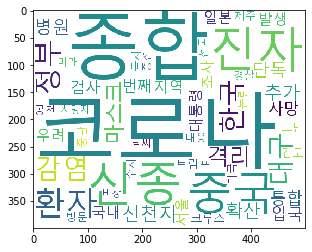

In [14]:
wc= WordCloud(font_path='C:/Windows/Fonts/malgun.ttf',
              width=500, height=400,
              max_words=100, max_font_size=150,
              background_color='white')
wc_result = wc.generate_from_frequencies(dict(top50_word)) # dict

import matplotlib.pyplot as plt
plt.imshow(wc_result)
